<a href="https://colab.research.google.com/github/BuiChiCuongs/BAOCAO_AI/blob/main/AI_Kind_of_Food10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import pickle

In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/food.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(5500, 112, 112, 3)
(5500, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape


(4400, 112, 112, 3)

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1,1), padding = 'same', activation = 'linear', input_shape=(112, 112, 3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])#(learning_rate=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=100), epochs=40,verbose = 1)#(, validation_data=aug.flow(X_test,y_test, batch_size=64))

<ipython-input-9-5037aa7816ba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=100), epochs=40,verbose = 1)#(, validation_data=aug.flow(X_test,y_test, batch_size=64))


Epoch 1/40
44/44 [==============================] - 14s 311ms/step - loss: 2.0325 - accuracy: 0.2600
Epoch 2/40
44/44 [==============================] - 14s 307ms/step - loss: 1.8521 - accuracy: 0.3445
Epoch 3/40
44/44 [==============================] - 14s 307ms/step - loss: 1.7550 - accuracy: 0.3900
Epoch 4/40
44/44 [==============================] - 13s 306ms/step - loss: 1.6389 - accuracy: 0.4327
Epoch 5/40
44/44 [==============================] - 13s 305ms/step - loss: 1.5195 - accuracy: 0.4791
Epoch 6/40
44/44 [==============================] - 14s 311ms/step - loss: 1.4296 - accuracy: 0.5152
Epoch 7/40
44/44 [==============================] - 13s 306ms/step - loss: 1.3662 - accuracy: 0.5418
Epoch 8/40
44/44 [==============================] - 14s 307ms/step - loss: 1.2654 - accuracy: 0.5732
Epoch 9/40
44/44 [==============================] - 14s 306ms/step - loss: 1.2197 - accuracy: 0.5882
Epoch 10/40
44/44 [==============================] - 14s 308ms/step - loss: 1.1164 - accura

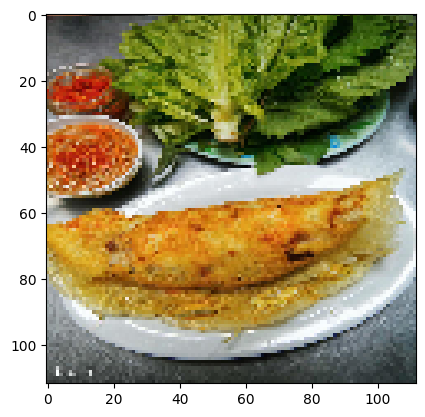

1/1 [==============================] - 0s 20ms/step
[[2.07621280e-08 2.23754262e-12 9.99676466e-01 1.37127188e-07
  1.08834275e-08 1.57905800e-10 1.16017679e-06 2.95173174e-12
  3.22235719e-04 4.29958860e-08]]
This picture is:  Banh xeo [2.07621280e-08 2.23754262e-12 9.99676466e-01 1.37127188e-07
 1.08834275e-08 1.57905800e-10 1.16017679e-06 2.95173174e-12
 3.22235719e-04 4.29958860e-08]
0.99967647


In [ ]:
class_name = ['Banh cuon','Banh mi','Banh xeo','Bun bo Hue','Bun dau mam tom',
              'Chao long','Com tam','Goi cuon','Mi Quang','Pho']
image = X[123]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[123]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/AI_Kind_of_Food10.h5')

In [ ]:
food10_model=load_model('/content/drive/MyDrive/Colab Notebooks/Model/AI_Kind_of_Food10.h5')